In [153]:
import pandas as pd
import matplotlib.pyplot as plt

In [173]:
!pip install pandas
!pip install matplotlib
!pip freeze > requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Load data**

In [154]:
data=pd.read_csv('/content/test - train.csv')
data.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 0:00:00,0.0
1,1,0,2016-01-01 0:00:00,0.0
2,2,0,2016-01-01 0:00:00,0.0
3,3,0,2016-01-01 0:00:00,0.0
4,4,0,2016-01-01 0:00:00,0.0


In [155]:
data.dtypes

building_id        int64
meter              int64
timestamp         object
meter_reading    float64
dtype: object

In [156]:
#creating copy of original data for Data exploration
feature=data

**Extracting date information from timestamp column**

In [157]:
feature['timestamp']= pd.to_datetime(feature['timestamp'], infer_datetime_format=True)

In [158]:
feature.dtypes

building_id               int64
meter                     int64
timestamp        datetime64[ns]
meter_reading           float64
dtype: object

In [159]:
feature['year']=pd.DatetimeIndex(feature['timestamp']).year
feature['month']=pd.DatetimeIndex(feature['timestamp']).month
feature['day']=pd.DatetimeIndex(feature['timestamp']).day
feature['hour']=pd.DatetimeIndex(feature['timestamp']).hour

In [160]:
print(feature.year.unique()) # 2016 is the only year
print(feature.month.unique()) # Jan is the only month
print(feature.day.unique()) # there are data for 10 days 
print(feature.hour.unique())

[2016]
[1]
[ 1  2  3  4  5  6  7  8  9 10]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [161]:
feature.head()

,building_id,meter,timestamp,meter_reading,year,month,day,hour
0,0,0,2016-01-01,0.0,2016,1,1,0
1,1,0,2016-01-01,0.0,2016,1,1,0
2,2,0,2016-01-01,0.0,2016,1,1,0
3,3,0,2016-01-01,0.0,2016,1,1,0
4,4,0,2016-01-01,0.0,2016,1,1,0


We can drop columns like timestamp, year , month as our analysis will be based on day column


In [162]:
feature.drop(columns=['timestamp','year','month'],inplace=True)
feature.head()

,building_id,meter,meter_reading,day,hour
0,0,0,0.0,1,0
1,1,0,0.0,1,0
2,2,0,0.0,1,0
3,3,0,0.0,1,0
4,4,0,0.0,1,0


**Building vs meter reading descriptive analysis**

In [163]:
pivot_building=feature.groupby(['building_id'])

In [164]:
build_meter_data=pd.DataFrame(pivot_building['meter_reading'].describe())
build_meter_data.to_csv('build_meter_data.csv')

**Meter Types vs meter reading descriptive analysis**

In [165]:
pivot_meter=feature.groupby(['meter'])

In [166]:
meter_reading_data=pd.DataFrame(pivot_meter['meter_reading'].describe())
meter_reading_data.to_csv('meter_reading_data.csv')

**Point 1c ) Missing values each building and meter type**


From below we can see that there are no missing values in meter or building_id

In [167]:
feature.isnull().sum(axis = 0)

building_id      0
meter            0
meter_reading    0
day              0
hour             0
dtype: int64

**Point d) Visualise hourly consumption**

We need to group our data on hourly basis and then for each building and meter type in order to check the total hourly meter reading.

In [168]:
hour_data=feature.groupby(['hour','building_id','meter']).sum().reset_index()
hour_data

,hour,building_id,meter,meter_reading,day
0,0,0,0,0.000,55
1,0,1,0,0.000,55
2,0,2,0,0.000,55
3,0,3,0,0.000,55
4,0,4,0,0.000,55
...,...,...,...,...,...
55391,23,1444,0,70.925,45
55392,23,1445,0,46.575,45
55393,23,1446,0,21.725,45
55394,23,1447,0,1423.825,45


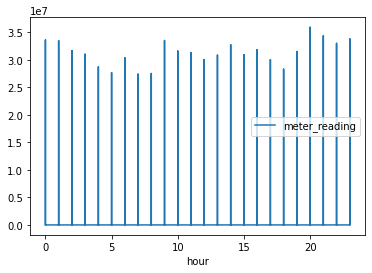

In [169]:
hour_data.plot(x='hour',y='meter_reading')

**point 3**

In [170]:
c_data=feature.groupby(['building_id','meter']).sum().reset_index()
c_data.drop(columns=['day','hour'],inplace=True)
c_data

,building_id,meter,meter_reading
0,0,0,0.0000
1,1,0,67.7099
2,2,0,4.0953
3,3,0,0.0000
4,4,0,0.0000
...,...,...,...
2307,1444,0,1458.8750
2308,1445,0,1242.2500
2309,1446,0,343.9750
2310,1447,0,32865.1750


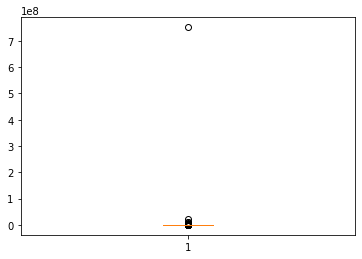

In [171]:
plt.boxplot(c_data['meter_reading'])
plt.show()

In [172]:
c_data.describe()

,building_id,meter,meter_reading
count,2312.000000,2312.000000,2.312000e+03
mean,813.947232,0.657872,4.301074e+05
std,426.362175,0.933620,1.564646e+07
min,0.000000,0.000000,0.000000e+00
25%,414.750000,0.000000,3.305390e+03
50%,907.000000,0.000000,1.440619e+04
75%,1197.000000,1.000000,4.811176e+04
max,1448.000000,3.000000,7.517846e+08
